Comparison of QR DMD to Zhang et al. Online Dynamic Mode Decomposition for Time-Varying Systems

- https://epubs.siam.org/doi/abs/10.1137/18M1192329?journalCode=sjaday

using their data & code

https://github.com/haozhg/odmd

In [570]:
%run fDMD_functions.ipynb

from scipy.integrate import odeint
from odmd import OnlineDMD
from odmd import WindowDMD
import time
import matplotlib.pyplot as plt

Njihovo

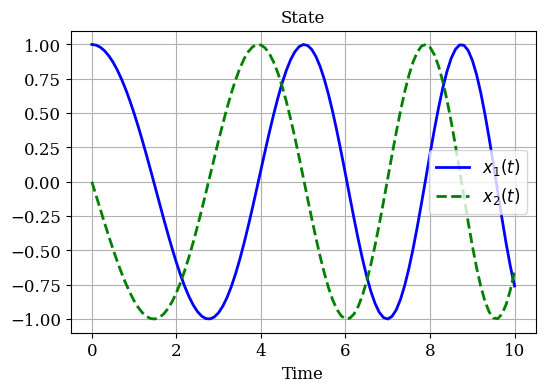

In [571]:
## prepisano iz njihovog

# define dynamics
epsilon = 1e-1
def dyn(x, t):
    x1, x2 = x
    dxdt = [(1+epsilon*t)*x2, -(1+epsilon*t)*x1]
    return dxdt

# integrate from initial condition [1,0]
tspan = np.linspace(0, 10, 101)
dt = 0.1
x0 = [1, 0]
xsol = odeint(dyn, x0, tspan).T
# extract snapshots
x, y = xsol[:, :-1], xsol[:, 1:]
t = tspan[1:]
# true dynamics, true eigenvalues
n, m = len(x[:, 0]), len(x[0, :])
A = np.empty((n, n, m))
evals = np.empty((n, m), dtype=complex)
for k in range(m):
    A[:, :, k] = np.array([[0, (1+epsilon*t[k])], [-(1+epsilon*t[k]), 0]])
    evals[:, k] = np.linalg.eigvals(A[:, :, k])

# visualize snapshots
plt.rcParams['figure.dpi'] = 100
plt.figure(figsize=(6,4))
plt.rc('text', usetex=False) #samo sam tu stavila da ne koristim tex..
plt.rc('font', family='serif')
plt.plot(tspan, xsol[0, :], 'b-', linewidth=2.0,  label='$x_1(t)$')
plt.plot(tspan, xsol[1, :], 'g--', linewidth=2.0,  label='$x_2(t)$')
plt.legend(loc='best', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.title('State', fontsize=12)
plt.tick_params(labelsize=12)
plt.grid()
plt.show()


#####################################################################################################################################
#   u x i u y su spremljeni podaci. evals su prave sv vrijednosti od A

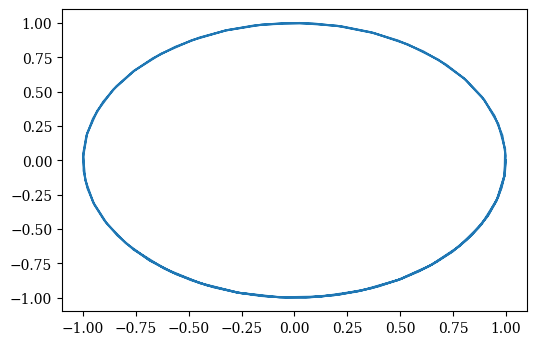

In [572]:
#rjesenja su na jedinicnoj kruznici
plt.plot(xsol[0,:], xsol[1,:])

In [573]:
q = 10 #toliko uzmem za pocetak
evalsonlineDMD1 = np.empty((n, m), dtype=complex)
odmd = OnlineDMD(n, 1.0)
odmd.initialize(x[:, :q], y[:, :q])
start = time.time()
for k in range(q, m):
    odmd.update(x[:, k], y[:, k])
    evalsonlineDMD1[:, k] = np.log(np.linalg.eigvals(odmd.A))/dt
end = time.time()
print("Online DMD, weighting = 1, time = " + str(end-start) + " secs")

Online DMD, weighting = 1, time = 0.012959718704223633 secs


In [574]:
Lambda, Z = odmd.computemodes()

In [575]:
Lambda
Z

array([[ 0.71071962+0.j        ,  0.71071962-0.j        ],
       [-0.01257925+0.70336291j, -0.01257925-0.70336291j]])

Nase

In [579]:
Z_nas, Lambda_nas, r, Q, L = fGEDMDQ_multiple_trajectories(x[:,:q], y[:,:q])
start_nas = time.time()
for k in range(q, m):
    Z_nas, Lambda_nas, r, Q, L = fDMD_added_snap(np.bmat([x[:,k],y[:,k]]).T, Q, L)
end_nas = time.time()
print("time: ", end_nas-start_nas, "sec")

time:  0.05182194709777832 sec


In [580]:
np.allclose(Q.T@Q, np.eye(Q.shape[1], Q.shape[1]))

True

[0. 0.]


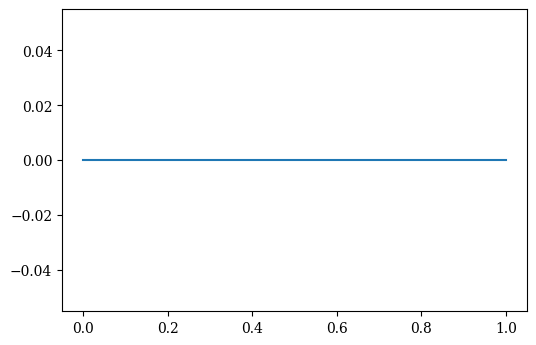

In [583]:
plt.plot(r) ### ispravljeno - dobijem mali r! Do sada je bio veliki..
print(r)

In [584]:
print("Our eigs", Lambda_nas, sep="\n")
print("Zhang eigs", Lambda, sep="\n")
print("Our modes", Z_nas, sep="\n")
print("Zhang modes", Z, sep="\n")

## razliciti modovi - radimo istu stvar..

## uzeti i podijeliti hadamardovo 
        # trebaju biti kolinearni s kompleksnim brojem.. - provjeriti.. 
print(Z_nas/Z) #da, kolinearni su s kompleksnim brojem.
np.linalg.norm(-0.69894563-0.71517481j), np.linalg.norm(-0.69894563+0.71517481j) #norma = 1... - OK

Our eigs
[0.98848465+0.14945306j 0.98848465-0.14945306j]
Zhang eigs
[0.98848465+0.14945306j 0.98848465-0.14945306j]
Our modes
[[ 0.71071962+0.j          0.71071962-0.j        ]
 [-0.01257925+0.70336291j -0.01257925-0.70336291j]]
Zhang modes
[[ 0.71071962+0.j          0.71071962-0.j        ]
 [-0.01257925+0.70336291j -0.01257925-0.70336291j]]
[[1.+0.00000000e+00j 1.+0.00000000e+00j]
 [1.+1.02319876e-15j 1.-1.02319876e-15j]]


(1.0000000012773165, 1.0000000012773165)

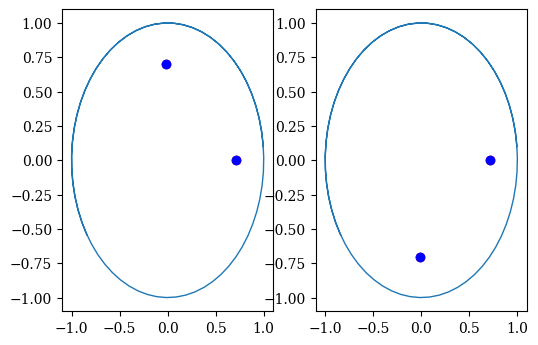

In [585]:
plt.subplot(1, 2, 1)
plt.plot(np.real(Z[:,0]), np.imag(Z[:,0]), 'o', label="zhang", color="r")
plt.plot(np.real(Z_nas[:,0]), np.imag(Z_nas[:,0]),'o', label="mi", color="b")
plt.plot(np.cos(t), np.sin(t), linewidth=1)


plt.subplot(1, 2, 2)
plt.plot(np.real(Z[:,1]), np.imag(Z[:,1]), 'o', label="zhang", color="r")
plt.plot(np.real(Z_nas[:,1]), np.imag(Z_nas[:,1]), 'o', label="mi", color="b")
plt.plot(np.cos(t), np.sin(t), linewidth=1)


plt.show()

In [586]:
#koje modove dobijem ako odmah ubacim sve x i y?
start_nas_sve=time.time()
Z_nas_svi, Lambda_nas_svi, r, Q, L = fGEDMDQ_multiple_trajectories(x, y)
end_nas_sve=time.time()
print("time: ", end_nas_sve-start_nas_sve, "sec")

time:  0.0010280609130859375 sec


In [587]:
print("Our batch modes", Z_nas_svi, sep="\n")
print("Our batch eigs", Lambda_nas_svi, sep="\n")

Our batch modes
[[ 0.71071962+0.j          0.71071962-0.j        ]
 [-0.01257925+0.70336291j -0.01257925-0.70336291j]]
Our batch eigs
[0.98848465+0.14945306j 0.98848465-0.14945306j]


In [588]:
indices=np.array([0,1]); times=[i for i in range(m)]
reconstructed=DMD_reconstruction(x, Z_nas, indices, Lambda_nas, times)

c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if __name__ == '__main__':


In [589]:
#nas reconstruction za njihov dmd..
reconstructed_njihovo = DMD_reconstruction(x, Z, indices, Lambda, times)

c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if __name__ == '__main__':


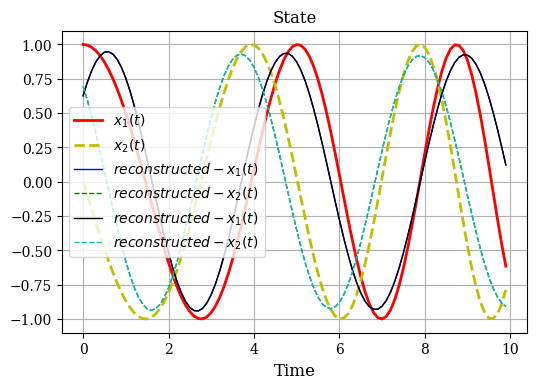

In [590]:
# visualize snapshots
plt.rcParams['figure.dpi'] = 100
plt.figure(figsize=(6,4))
plt.rc('text', usetex=False) #samo sam tu stavila da ne koristim tex..
plt.rc('font', family='serif')
plt.plot(tspan[:-1], x[0, :], 'r-', linewidth=2.0,  label='$x_1(t)$')
plt.plot(tspan[:-1], x[1, :], 'y--', linewidth=2.0,  label='$x_2(t)$')
plt.plot(tspan[:-1], reconstructed[0, :], 'b-', linewidth=1.0,  label='$reconstructed - x_1(t)$')
plt.plot(tspan[:-1], reconstructed[1, :], 'g--', linewidth=1.0,  label='$reconstructed - x_2(t)$')
plt.plot(tspan[:-1], reconstructed_njihovo[0, :], 'k-', linewidth=1.0,  label='$reconstructed - x_1(t)$')
plt.plot(tspan[:-1], reconstructed_njihovo[1, :], 'c--', linewidth=1.0,  label='$reconstructed - x_2(t)$')
plt.legend(loc='best', fontsize=10)
plt.xlabel('Time', fontsize=12)
plt.title('State', fontsize=12)
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

#nase i njihove predikcije se preklapaju

window

In [591]:
w = 20 #toliko uzmem za pocetak

times_init=[i for i in range(w+1)]; times=[w]


wdmd = WindowDMD(n, w)
wdmd.initialize(x[:,:w], y[:,:w]) # this is necessary for window DMD
start = time.time()
for k in range(w, m):
    wdmd.update(x[:, k], y[:, k])
    Lambda_w, Z_w = wdmd.computemodes()
    if k==w:
        reconstructed_njihovo_w = DMD_reconstruction(x[:,:w], Z_w, 'all', Lambda_w, times_init)
    else:
        reconstructed_njihovo_w = np.append(reconstructed_njihovo_w,DMD_reconstruction(x[:,k-w+1:k+1], Z_w, 'all', Lambda_w, times), axis=1)
end = time.time()

print("Window DMD, weighting = 1, time = " + str(end-start) + " secs")


Z_nas_w, Lambda_nas_w, r, Q, L = fGEDMDQ_multiple_trajectories(x[:,:w], y[:,:w])
start_nas = time.time()
for k in range(w, m):
    Z_nas_w, Lambda_nas_w, r, Q, L = fDMD_discarding_snap(Q, L, 1)
    Z_nas_w, Lambda_nas_w, r, Q, L = fDMD_added_snap(np.bmat([x[:,k],y[:,k]]).T, Q, L)
    if k==w:
        reconstructed_nas_w = DMD_reconstruction(x[:,:w], Z_nas_w, 'all', Lambda_nas_w, times_init)
    else:
        reconstructed_nas_w = np.append(reconstructed_nas_w,DMD_reconstruction(x[:,k-w+1:k+1], Z_nas_w, 'all', Lambda_nas_w, times), axis=1)
end_nas = time.time()
print("time: ", end_nas-start_nas, "sec")

Window DMD, weighting = 1, time = 0.09765052795410156 secs
time:  0.10637593269348145 sec


In [592]:
#provjera je li Q i dalje ortg.

np.allclose(Q.T@Q, np.eye(4,4))

True

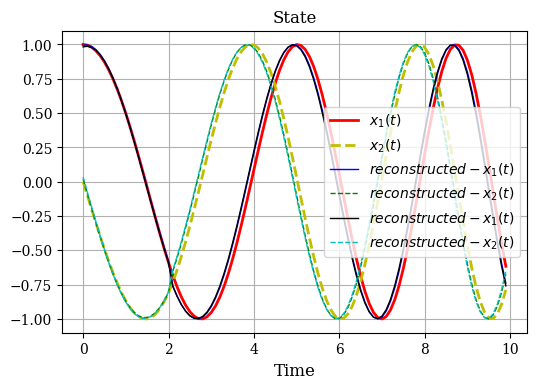

In [593]:
# visualize snapshots
plt.rcParams['figure.dpi'] = 100
plt.figure(figsize=(6,4))
plt.rc('text', usetex=False) #samo sam tu stavila da ne koristim tex..
plt.rc('font', family='serif')
plt.plot(tspan[:-1], x[0, :], 'r-', linewidth=2.0,  label='$x_1(t)$')
plt.plot(tspan[:-1], x[1, :], 'y--', linewidth=2.0,  label='$x_2(t)$')
plt.plot(tspan[:-1], reconstructed_nas_w[0, :], 'b-', linewidth=1.0,  label='$reconstructed - x_1(t)$')
plt.plot(tspan[:-1], reconstructed_nas_w[1, :], 'g--', linewidth=1.0,  label='$reconstructed - x_2(t)$')
plt.plot(tspan[:-1], reconstructed_njihovo_w[0, :], 'k-', linewidth=1.0,  label='$reconstructed - x_1(t)$')
plt.plot(tspan[:-1], reconstructed_njihovo_w[1, :], 'c--', linewidth=1.0,  label='$reconstructed - x_2(t)$')
plt.legend(loc='best', fontsize=10)
plt.xlabel('Time', fontsize=12)
plt.title('State', fontsize=12)
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

#nase i njihove predikcije se preklapaju

############ PUNO BOLJE:) jako slican rezultat i za 5 (window size) i 20 (malo ljepsi pocetak kada ih je 20..)

STACKED

In [594]:
num_stack = 10
#num_stack=30
x_stacked = x[:,:(m-num_stack+1)]
y_stacked = y[:,:(m-num_stack+1)]

for i in range(1,num_stack):
    x_stacked=np.vstack((x_stacked,x[:,i:(m-num_stack+1+i)]))
    y_stacked=np.vstack((y_stacked,y[:,i:(m-num_stack+1+i)]))

(n,m)=x_stacked.shape

In [595]:
#je li dobro formirano..

print(x_stacked.shape, y_stacked.shape)

k=np.random.randint(num_stack, m-num_stack)
for i in range(1,num_stack):
    if(np.all(x[:2,k]==x_stacked[2*i:2*i+2,k-i]) and np.all(y[:2,k]==y_stacked[2*i:2*i+2,k-i])):
        print(True, end=" ")
    else:
        print(False, x[:2,k],x_stacked[2*i:2*i+2,k-i])

(20, 91) (20, 91)
True True True True True True True True True 

In [596]:
q = 41 #toliko uzmem za pocetak
evalsonlineDMD1 = np.empty((n, m), dtype=complex)
odmd = OnlineDMD(n, 1.0)
odmd.initialize(x_stacked[:, :q], y_stacked[:, :q])
start = time.time()
for k in range(q, m):
    odmd.update(x_stacked[:, k], y_stacked[:, k])
    evalsonlineDMD1[:, k] = np.log(np.linalg.eigvals(odmd.A))/dt
end = time.time()
print("Online DMD, weighting = 1, time = " + str(end-start) + " secs")

Lambda, Z = odmd.computemodes()

print(Lambda); print(Z)

Online DMD, weighting = 1, time = 0.01700568199157715 secs
[-0.80248811+0.j         -0.76904813+0.38646172j -0.76904813-0.38646172j
 -0.55230594+0.51374504j -0.55230594-0.51374504j -0.29320455+0.7694069j
 -0.29320455-0.7694069j   0.3751896 +1.03860094j  0.3751896 -1.03860094j
  0.09913815+0.j          1.03417002+0.23291597j  1.03417002-0.23291597j
  1.01023849+0.18787869j  1.01023849-0.18787869j  0.98919617+0.14970618j
  0.98919617-0.14970618j  0.96623322+0.11496382j  0.96623322-0.11496382j
  0.94098022+0.07752378j  0.94098022-0.07752378j]
[[ 3.09354642e-01+0.j         -4.05605592e-01-0.19085185j
  -4.05605592e-01+0.19085185j  3.16791243e-01+0.22212652j
   3.16791243e-01-0.22212652j  4.60741846e-02-0.39234383j
   4.60741846e-02+0.39234383j -4.74606086e-02-0.15195397j
  -4.74606086e-02+0.15195397j  3.74685455e-01+0.j
  -1.52523584e-01+0.06866155j -1.52523584e-01-0.06866155j
  -1.65135830e-02-0.19596624j -1.65135830e-02+0.19596624j
  -2.17808372e-01-0.04846991j -2.17808372e-01+0.04846991

In [597]:
Z_nas, Lambda_nas, r, Q, L = fGEDMDQ_multiple_trajectories(x_stacked[:,:q], y_stacked[:,:q]) #isti rez ako dodam tol 1e-6, 
                                                                                                    #ako stavim tol = 1e-3 malo losiji rez
start_nas = time.time()
for k in range(q, m):
    Z_nas, Lambda_nas, r, Q, L = fDMD_added_snap(np.bmat([x_stacked[:,k],y_stacked[:,k]]).T, Q, L)
end_nas = time.time()
print("time: ", end_nas-start_nas, "sec")

print("Our eigs", Lambda_nas, sep="\n")
print("Zhang eigs", Lambda, sep="\n")
print("Our modes", Z_nas, sep="\n")
print("Zhang modes", Z, sep="\n")

## razliciti modovi - radimo istu stvar..

time:  0.14919686317443848 sec
Our eigs
[-0.75538766+0.33915819j -0.75538766-0.33915819j -0.74806169+0.11837495j
 -0.74806169-0.11837495j -0.40385114+0.69832686j -0.40385114-0.69832686j
 -0.13321256+0.73805052j -0.13321256-0.73805052j  0.56000838+0.j
  1.04200161+0.2377702j   1.04200161-0.2377702j   1.01850531+0.19335474j
  1.01850531-0.19335474j  0.99715353+0.15539989j  0.99715353-0.15539989j
  0.97555233+0.11917935j  0.97555233-0.11917935j  0.95137619+0.08039789j
  0.95137619-0.08039789j  0.96896002+0.j        ]
Zhang eigs
[-0.80248811+0.j         -0.76904813+0.38646172j -0.76904813-0.38646172j
 -0.55230594+0.51374504j -0.55230594-0.51374504j -0.29320455+0.7694069j
 -0.29320455-0.7694069j   0.3751896 +1.03860094j  0.3751896 -1.03860094j
  0.09913815+0.j          1.03417002+0.23291597j  1.03417002-0.23291597j
  1.01023849+0.18787869j  1.01023849-0.18787869j  0.98919617+0.14970618j
  0.98919617-0.14970618j  0.96623322+0.11496382j  0.96623322-0.11496382j
  0.94098022+0.07752378j  0.9409

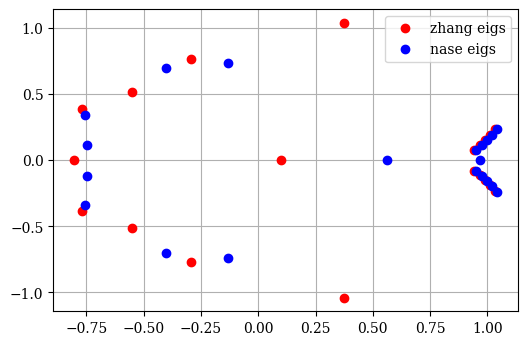

In [598]:
plt.plot(np.real(Lambda), np.imag(Lambda), 'o', color="r", label="zhang eigs")
plt.plot(np.real(Lambda_nas), np.imag(Lambda_nas), 'o', color="b", label="nase eigs")
plt.grid()
plt.legend()
plt.show()

In [599]:
indices=np.array([i for i in range (Z_nas.shape[1])]); times=[i for i in range(m)]
reconstructed=DMD_reconstruction(x_stacked, Z_nas, indices, Lambda_nas, times)

indices=np.array([i for i in range (Z.shape[1])]); times=[i for i in range(m)]
reconstructed_njihovo = DMD_reconstruction(x_stacked, Z, indices, Lambda, times)

c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if __name__ == '__main__':


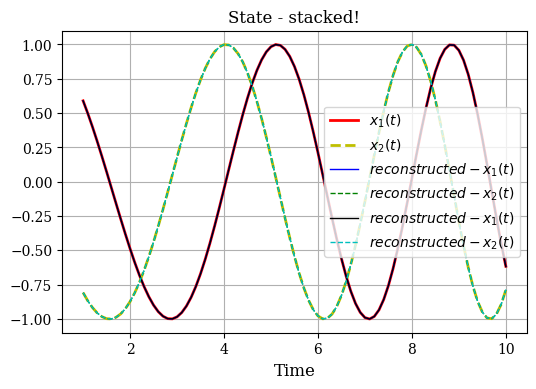

In [600]:
# visualize snapshots
plt.rcParams['figure.dpi'] = 100
plt.figure(figsize=(6,4))
plt.rc('text', usetex=False) #samo sam tu stavila da ne koristim tex..
plt.rc('font', family='serif')
plt.plot(tspan[num_stack:], x_stacked[-2, :], 'r-', linewidth=2.0,  label='$x_1(t)$')
plt.plot(tspan[num_stack:], x_stacked[-1, :], 'y--', linewidth=2.0,  label='$x_2(t)$')
plt.plot(tspan[num_stack:], reconstructed[-2, :], 'b-', linewidth=1.0,  label='$reconstructed - x_1(t)$')
plt.plot(tspan[num_stack:], reconstructed[-1, :], 'g--', linewidth=1.0,  label='$reconstructed - x_2(t)$')
plt.plot(tspan[num_stack:], reconstructed_njihovo[-2, :], 'k-', linewidth=1.0,  label='$reconstructed - x_1(t)$')
plt.plot(tspan[num_stack:], reconstructed_njihovo[-1, :], 'c--', linewidth=1.0,  label='$reconstructed - x_2(t)$')
plt.legend(loc='best', fontsize=10)
plt.xlabel('Time', fontsize=12)
plt.title('State - stacked!', fontsize=12)
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

#nase i njihove predikcije se preklapaju 

###BOLJI REZULTATI SA STACKED!!